<a href="https://colab.research.google.com/github/Bksimon/Emory_MSBA/blob/main/Knn%26LogisticRegressionHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code implements **K Nearest Neighbors (K-nn)** and **Logistic Regression** to predict malignant or benign cancer with dataset: "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"


*   Data understanding - histogram distribution and correlation matrix
*   Split validation - 70/30 split
*   CLassification report - visualize accuracy, F1-score, and Kappa Score



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, cohen_kappa_score

In [ ]:
import yellowbrick
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

In [ ]:
# read in df from link
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url)

In [ ]:
df['malignant'] = df.iloc[:, 1].str.replace('M', '1')
df['malignant'] = df['malignant'].str.replace('B', '0')
df['malignant'] = df['malignant'].astype(int)

In [ ]:
df = df.dropna()
df.isna().values.any()

False

In [ ]:
df.iloc[:,1].value_counts()

B    357
M    211
Name: M, dtype: int64

In [ ]:
df.describe()

,842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,malignant
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,0.403958,1.217402,2.855984,40.138025,0.007042,0.025437,0.031855,0.011789,0.020526,0.003791,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884,0.371479
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,0.276038,0.551979,2.009288,45.282406,0.003005,0.017897,0.030199,0.006173,0.008264,0.002646,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017,0.483626
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,0.232375,0.833150,1.605000,17.850000,0.005166,0.013048,0.015063,0.007634,0.015128,0.002244,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412,0.000000
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,0.323950,1.109500,2.285500,24.485000,0.006374,0.020435,0.025875,0.010920,0.018725,0.003162,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015,0.000000
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,0.477325,1.474250,3.336750,45.017500,0.008151,0.032217,0.041765,0.014710,0.023397,0.004526,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66d670e410>,
      dtype=object)

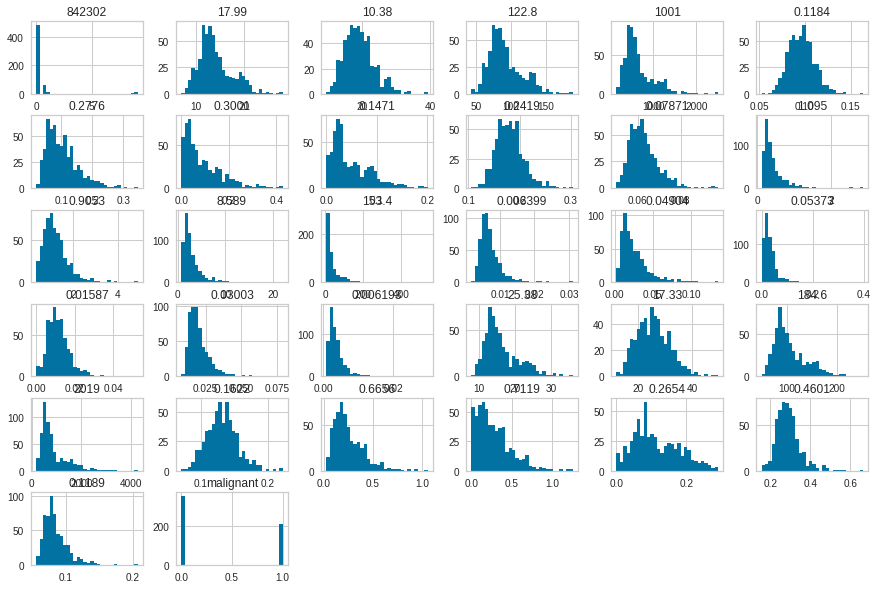

In [ ]:
%matplotlib inline
df.hist(bins=30, figsize=(15,10))

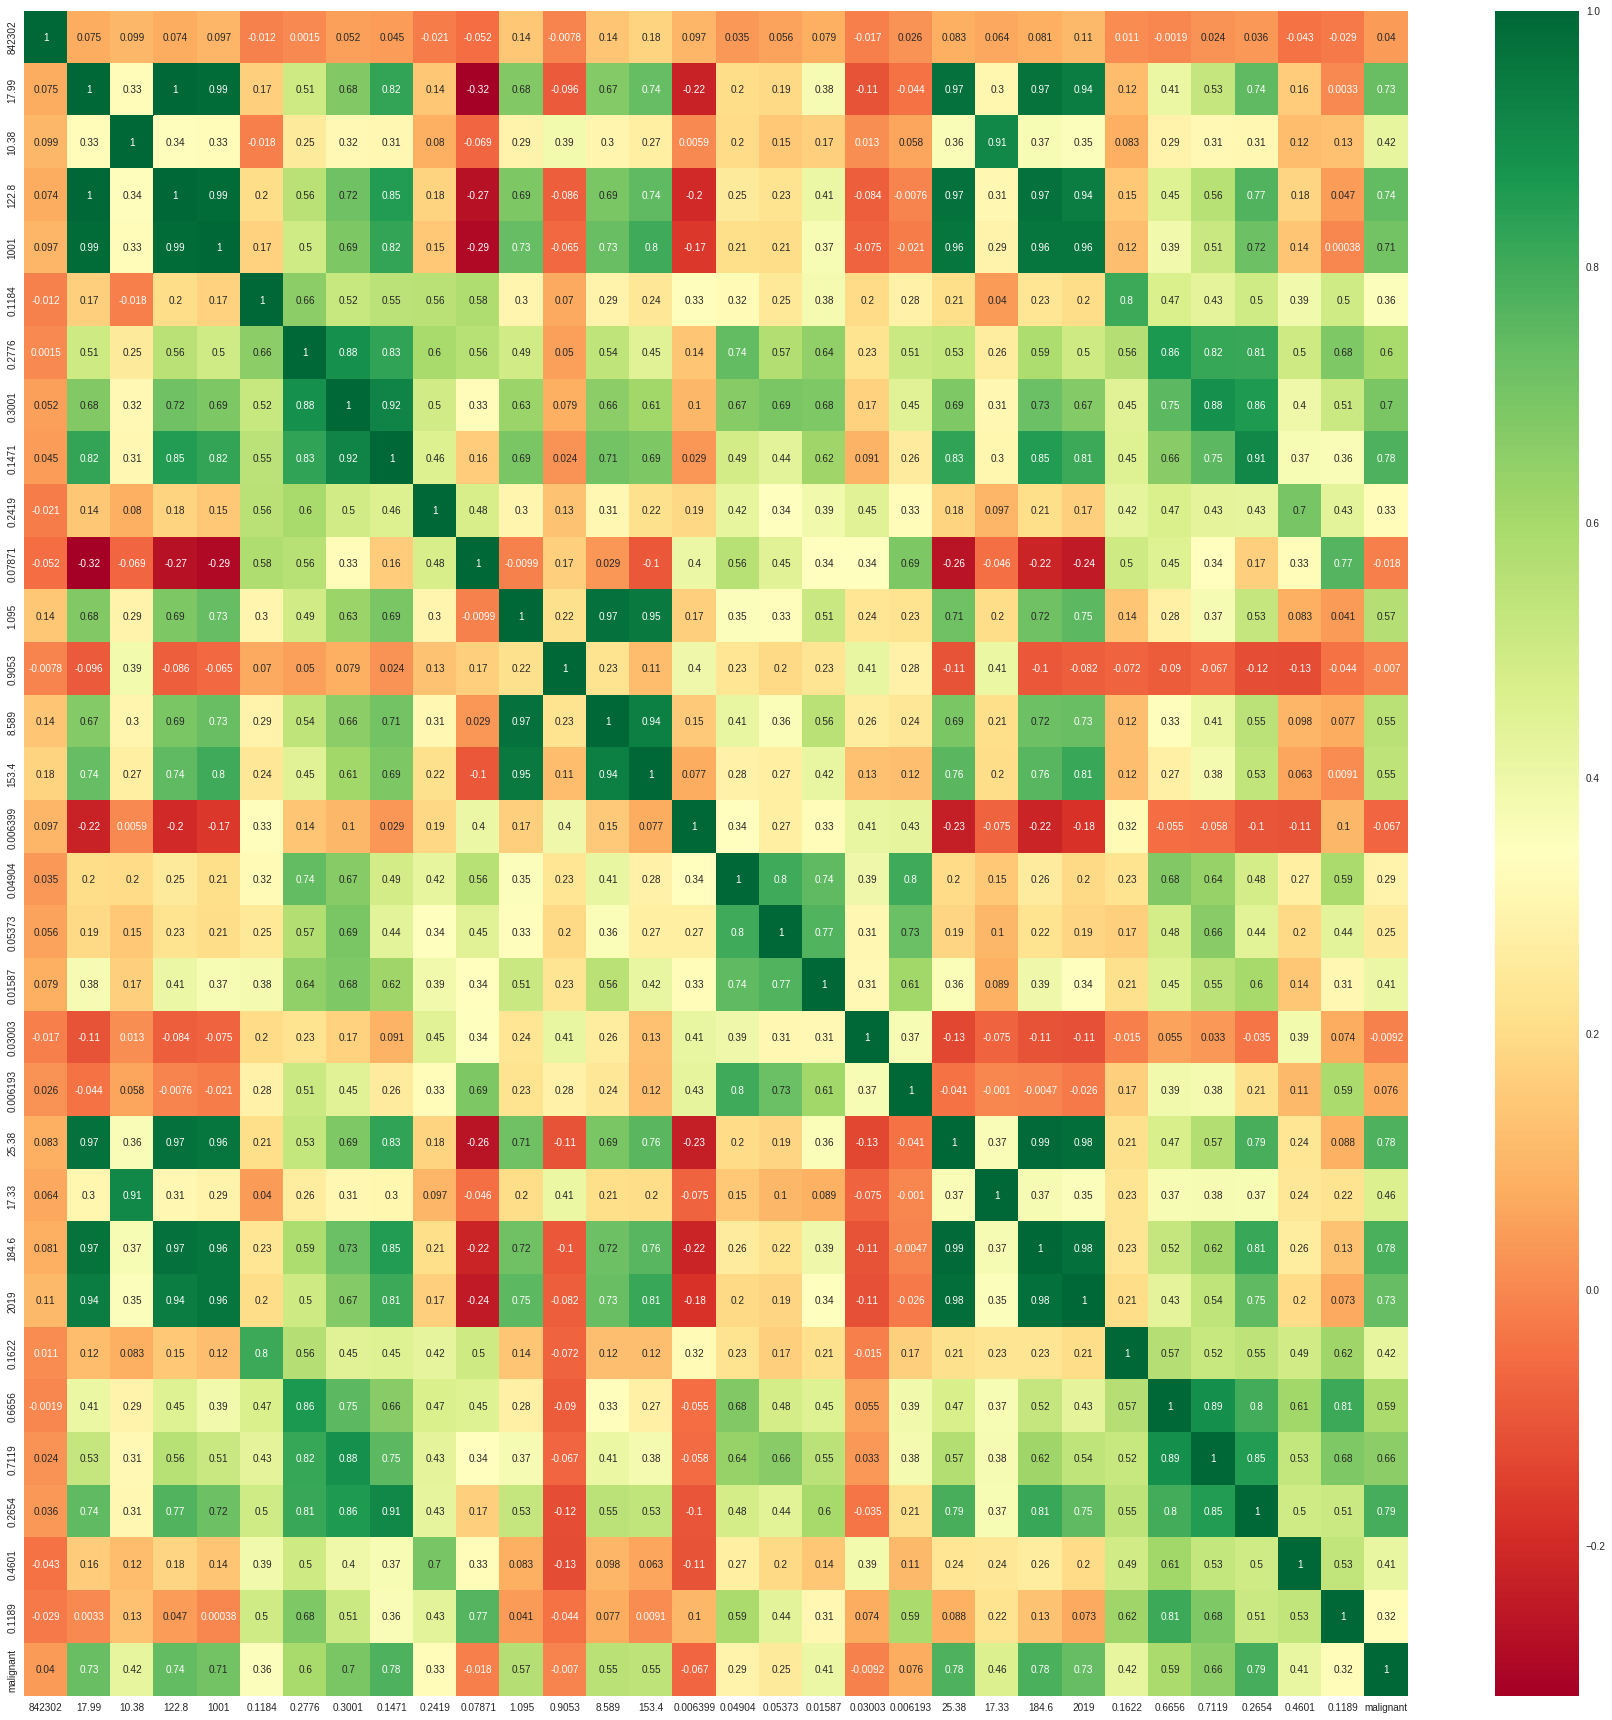

In [ ]:
# corr matrix
corr_matrix = df.corr()
top_correlated_feats = corr_matrix.index
plt.figure(figsize=(31,31))

plot = sns.heatmap(df[top_correlated_feats].corr(), annot=True, cmap="RdYlGn")

In [ ]:
## model building ##
# define attributes and target variable
y = df.iloc[:,1]
x = df.iloc[:,2:]
x.columns

Index(['17.99', '10.38', '122.8', '1001', '0.1184', '0.2776', '0.3001',
       '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589', '153.4',
       '0.006399', '0.04904', '0.05373', '0.01587', '0.03003', '0.006193',
       '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656', '0.7119',
       '0.2654', '0.4601', '0.1189', 'malignant'],
      dtype='object')

In [ ]:
# split validaiton
X_train, X_test, Y_train, Y_test =  train_test_split(x,y, test_size=.3, random_state=1, stratify=y)

In [ ]:
## Knn model ##
# normalize data
sc =  StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# stack data
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((Y_train, Y_test))

In [ ]:
## logistic Regression Model ##
clf = linear_model.LogisticRegression(C=1e5)
clf = clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

print('Accuracy (out of sample): %.2f' % accuracy_score(Y_test, y_pred))
print('F1 Score (out of sample): %.2f' % f1_score(Y_test, y_pred, average = 'macro'))
print('Kappa score (out of sample): %.2f' % cohen_kappa_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred, target_names=['benign', 'malignant']))

Confusion_Matrix = pd.DataFrame(
    confusion_matrix(Y_test, y_pred),
    columns = ['Predicted benign', 'Predicted malignant'],
    index = ['True benign', 'True malignant']
)
Confusion_Matrix

Accuracy (out of sample): 0.99
F1 Score (out of sample): 0.99
Kappa score (out of sample): 0.98
              precision    recall  f1-score   support

      benign       0.99      0.99      0.99       107
   malignant       0.98      0.98      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Predicted benign,Predicted malignant
True benign,106,1
True malignant,1,63


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Confusion Matrix
[[106   1]
 [  0  64]]




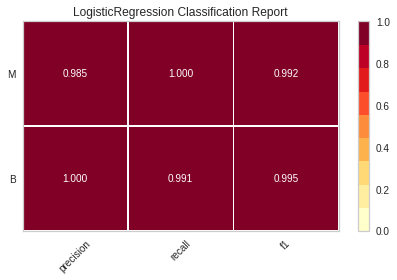

In [ ]:
for C in [10000]:
  logregression = LogisticRegression(C=C, random_state=1)

  logregression.fit(X_train, Y_train)

  y_pred_logregression = logregression.predict(X_test)
  print("Confusion Matrix")
  print(metrics.confusion_matrix(Y_test, y_pred_logregression))
  print("\n")

  # visualize performance
  visualizer = ClassificationReport(logregression)
  visualizer.fit(X_train, Y_train)
  visualizer.score(X_test, Y_test)
  visualizer.poof()
